### Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import os

### Load Clean DataSet

In [2]:
os.getcwd()

'g:\\My Drive\\SMU AI\\Projects\\Stroke_Prediction-'

In [3]:
df=pd.read_csv('clean-healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4908 non-null   float64
 1   hypertension                    4908 non-null   int64  
 2   heart_disease                   4908 non-null   int64  
 3   avg_glucose_level               4908 non-null   float64
 4   bmi                             4908 non-null   float64
 5   Male                            4908 non-null   int64  
 6   ever_married                    4908 non-null   int64  
 7   Urban                           4908 non-null   int64  
 8   work_type_Govt_job              4908 non-null   int64  
 9   work_type_Never_worked          4908 non-null   int64  
 10  work_type_Private               4908 non-null   int64  
 11  work_type_Self-employed         4908 non-null   int64  
 12  work_type_children              49

## About the DataSet

### **EXTREMELY UNBALANCED**

### The "cleaned and encoded" dataset contains 4908 records
### Only 209 (4.25%) of these are positive for stroke and the rest (95.74%) are negative

### Will try to create models with different less unbalanced samples to run prediction models

### **Fortunately/Unfortunately there might not be enough positive cases to effectively predict**

### StandardScaler Scaled

In [4]:
ss=StandardScaler()
ss_scaled=ss.fit_transform(df)
ss_df=pd.DataFrame(ss_scaled, columns=df.columns)
ss_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married,Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.069938,-0.318102,4.381499,2.777797,0.981145,1.200240,0.729270,0.985436,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,2.206992,-0.778473,-0.420353,4.741651
1,1.646336,-0.318102,4.381499,0.014016,0.459086,1.200240,0.729270,-1.014779,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,-0.453105,1.284565,-0.420353,4.741651
2,0.271847,-0.318102,-0.228232,1.484266,0.701016,-0.833166,0.729270,0.985436,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,-0.453105,-0.778473,2.378956,4.741651
3,1.601998,3.143642,-0.228232,1.549325,-0.623231,-0.833166,0.729270,-1.014779,-0.383751,-0.067102,-1.157312,2.309308,-0.397953,-0.658022,-0.453105,1.284565,-0.420353,4.741651
4,1.690675,-0.318102,-0.228232,1.821493,0.013426,1.200240,0.729270,0.985436,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,2.206992,-0.778473,-0.420353,4.741651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,-1.324334,-0.318102,-0.228232,-0.049918,-1.310821,-0.833166,-1.371234,-1.014779,-0.383751,-0.067102,-1.157312,-0.433030,2.512858,1.519706,-0.453105,-0.778473,-0.420353,-0.210897
4904,1.690675,-0.318102,-0.228232,0.448045,1.414072,-0.833166,0.729270,0.985436,-0.383751,-0.067102,-1.157312,2.309308,-0.397953,-0.658022,-0.453105,1.284565,-0.420353,-0.210897
4905,-0.348890,-0.318102,-0.228232,-0.502181,0.217156,-0.833166,0.729270,-1.014779,-0.383751,-0.067102,-1.157312,2.309308,-0.397953,-0.658022,-0.453105,1.284565,-0.420353,-0.210897
4906,0.360524,-0.318102,-0.228232,1.373057,-0.419501,1.200240,0.729270,-1.014779,-0.383751,-0.067102,0.864071,-0.433030,-0.397953,-0.658022,2.206992,-0.778473,-0.420353,-0.210897


In [5]:
ss_df.max()

age                                1.735013
hypertension                       3.143642
heart_disease                      4.381499
avg_glucose_level                  3.746933
bmi                                8.748363
Male                               1.200240
ever_married                       0.729270
Urban                              0.985436
work_type_Govt_job                 2.605854
work_type_Never_worked            14.902715
work_type_Private                  0.864071
work_type_Self-employed            2.309308
work_type_children                 2.512858
smoking_status_Unknown             1.519706
smoking_status_formerly smoked     2.206992
smoking_status_never smoked        1.284565
smoking_status_smokes              2.378956
stroke                             4.741651
dtype: float64

### Standard Scaler gave a value of 14.90 to an orginal value of 1 on the column work_type_Never_worked 
### This value almost doubles any other "scaled" value 

In [6]:
ss_df['work_type_Never_worked'].value_counts()

work_type_Never_worked
-0.067102     4886
 14.902715      22
Name: count, dtype: int64

In [7]:
ss_df['stroke'].value_counts()/len(ss_df)*100

stroke
-0.210897    95.741646
 4.741651     4.258354
Name: count, dtype: float64

In [8]:
# Define a function
def int_result(value):
    if value < 0:
        return 0
    return 1

# "Apply" the function to the amount column
ss_df['stroke'] = ss_df['stroke'].apply(int_result)

### DataFrame Dictionary with Proportional Positive and negative Samples

In [9]:

def create_sample_dfs_dictionary(df):
    Positives=df.loc[df['stroke']==df['stroke'].max()]
    Negative_sample_1=df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
        .sample(len(Positives),random_state=1, ignore_index=True)
    Negative_sample_2=df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
        .sample(len(Positives),random_state=3, ignore_index=True)
    Negative_sample_3=df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
        .sample(len(Positives),random_state=5, ignore_index=True)
    DataFrames={}
    DataFrames['One to One']= pd.concat([Positives,Negative_sample_1], axis=0)
    DataFrames['One to Two']= pd.concat([Positives,Negative_sample_1, \
                                        Negative_sample_2], axis=0)
    DataFrames['One to Three']= pd.concat([Positives,Negative_sample_1, \
                                        Negative_sample_2,Negative_sample_3], axis=0)
    return DataFrames

### Create 1 ALL Positive and 3 ALL negative sample df's

In [10]:

ss_Positives=ss_df.loc[ss_df['stroke']==ss_df['stroke'].max()]
ss_Negative_sample_1=ss_df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
    .sample(len(ss_Positives),random_state=1, ignore_index=True)
ss_Negative_sample_2=ss_df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
    .sample(len(ss_Positives),random_state=3, ignore_index=True)
ss_Negative_sample_3=ss_df.loc[ss_df['stroke']==ss_df['stroke'].min()] \
    .sample(len(ss_Positives),random_state=5, ignore_index=True)


### Dictionary of Proportional Positive and Negative rows

In [11]:

DataFrames={}
DataFrames['One to One']= pd.concat([ss_Positives,ss_Negative_sample_1], axis=0)
DataFrames['One to Two']= pd.concat([ss_Positives,ss_Negative_sample_1, \
                                   ss_Negative_sample_2], axis=0)
DataFrames['One to Three']= pd.concat([ss_Positives,ss_Negative_sample_1, \
                                     ss_Negative_sample_2,ss_Negative_sample_3], axis=0)



### Balanced and proportionally unbalanced sets

In [12]:
print(len(DataFrames['One to One']))
print(len(DataFrames['One to Two']))
print(len(DataFrames['One to Three']))

418
627
836


### The positive results include only 2 that have Never worked under the column of Children

<Axes: >

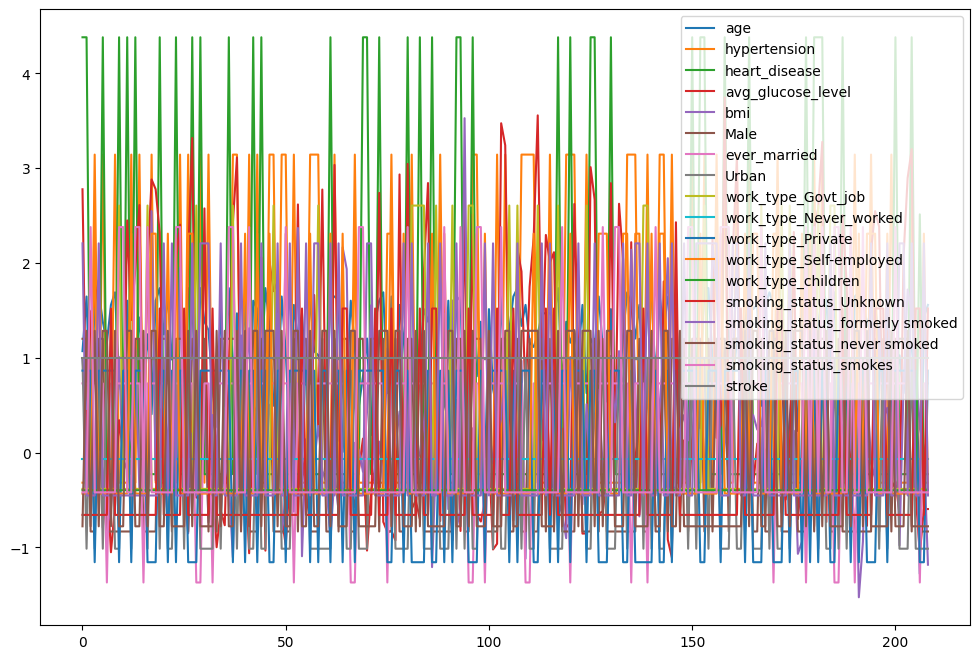

In [13]:
ss_Positives.plot(figsize=(12,8))

In [14]:
def print_confusion_matrix(y_test,prediction,Labels):
    cm=confusion_matrix(y_test,prediction,labels=Labels)
    print(f'\033[1mConfusion Matrix\033[0m')
    print(f'Predicted\\Actual\tPositive\tNegative')
    print(f'Positive({cm[0][0]+cm[0][1]})\t\t{cm[0][0]}\t\t{cm[0][1]}')
    print(f'Negative({cm[1][0]+cm[1][1]})\t\t{cm[1][0]}\t\t{cm[1][1]}')

### RandomForestClassifier Score difference analysis by depth

In [15]:
def best_depth(X_train,X_test,y_train,y_test):
    # print('Calculating best depth for RandomForestClassifier')
    train_score=0
    depth=0
    best=0
    hight_score=0
    while train_score<1:
        depth+=1
        clf = RandomForestClassifier(max_depth = depth)
        clf.fit(X_train, y_train)

        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)

        train_score = balanced_accuracy_score(y_train, train_pred)
        test_score = balanced_accuracy_score(y_test, test_pred)
        score=test_score*(1-(train_score-test_score))
        if hight_score<score:
            hight_score=score
            best=depth
    return best      


In [ ]:
def best_depth_graph(X_train,X_test,y_train,y_test):
    # print('Calculating best depth for RandomForestClassifier')
    train_score=0
    depth=0
    best=0
    hight_score=0
    while train_score<1:
        depth+=1
        clf = RandomForestClassifier(max_depth = depth)
        clf.fit(X_train, y_train)

        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)

        train_score = balanced_accuracy_score(y_train, train_pred)
        test_score = balanced_accuracy_score(y_test, test_pred)
        score=test_score*(1-(train_score-test_score))
        if hight_score<score:
            hight_score=score
            best=depth
    
    return best      


### Training Models

In [16]:
models={}
models['Logistic Regression']=LogisticRegression()
models['Random Forest Clasifier']=RandomForestClassifier()
models['SVC']=SVC()

### **train_test_split and ALL the tests**

In [17]:
def Test_Results(df):
    X_available=df.copy().drop(columns='stroke')
    y_available=df['stroke']
    tab='   '
    DataFrames=create_sample_dfs_dictionary(df)
    for name, Learning_model in models.items():    
        print(f'\033[94m\033[1m{name}\033[0m')
        for key,df in DataFrames.items():
            X=df.copy().drop(columns='stroke')
            y=df['stroke']
            X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
            if name=='Random Forest Clasifier':
                Learning_model=RandomForestClassifier(max_depth=\
                                best_depth(X_train,X_test,y_train,y_test))
            model=Learning_model
            model.fit(X_train,y_train)
            predicted = model.predict(X_test)
            available_predict=model.predict(X_available)

            # Score the predictions with mse and r2
            test_mse = mean_squared_error(y_test, predicted)
            test_r2 = r2_score(y_test, predicted)
            available_mse=mean_squared_error(y_available, available_predict)
            available_r2=r2_score(y_available, available_predict)
            test_balanced_accuracy=balanced_accuracy_score(y_test, predicted)
            available_balanced_accuracy=balanced_accuracy_score(y_available, available_predict)

            #region Print Results
            print(f'{tab}\033[96m\033[1m{key} ({len(df)} items )\033[0m : ', end='')
            print(f'Model Score: {model.score(X_train,y_train):.4f}')
            print(f'\t\t\t\t\t\033[1mTest Data\tAvailable Data\t\tDifference\033[0m')
            print(f"{tab}{tab}Mean Squared Error (MSE):\t\t{test_mse:.4f}"+
                f"\t\t{available_mse:.4f}\t\t\t{abs(test_mse-available_mse):.4f}")
            print(f"{tab}{tab}R-squared (R2):\t\t\t{test_r2:.4f}\t\t{available_r2:.4f}"+
                f"\t\t\t{abs(test_r2-available_r2):.4f}")
            print(f"{tab}{tab}Balanced Accuracy:\t\t{test_balanced_accuracy:.4f}"+
                f"\t\t{available_balanced_accuracy:.4f}\t\t\t"+
                f"{abs(test_balanced_accuracy-available_balanced_accuracy):.4f}")
            print()
            print(f'\033[1mClassification Report on Test Data\033[0m')
            print(f'{classification_report(y_test, predicted)}')
            print(f'\033[1mClassification Report on Available Data\033[0m')
            print(f'{classification_report(y_available, available_predict)}')

            print_confusion_matrix(y_test, predicted,[1,0])

            print()
            #endregion
            
        print('***'*10)

In [ ]:
for key1,value1 in text:
    if type(value1) is dict:
        print()
        for key2,value2 in value1:


In [23]:

X_available=ss_df.copy().drop(columns='stroke')
y_available=ss_df['stroke']
tab='   '
for name, Learning_model in models.items():    
    print(f'\033[94m\033[1m{name}\033[0m')
    for key,df in DataFrames.items():
          X=df.copy().drop(columns='stroke')
          y=df['stroke']
          X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
          if name=='Random Forest Clasifier':
                Depth=best_depth(X_train,X_test,y_train,y_test)
                Learning_model=RandomForestClassifier(max_depth=Depth)
          model=Learning_model
          model.fit(X_train,y_train)
          predicted = model.predict(X_test)
          available_predict=model.predict(X_available)

          # Score the predictions with mse and r2
          test_mse = mean_squared_error(y_test, predicted)
          test_r2 = r2_score(y_test, predicted)
          available_mse=mean_squared_error(y_available, available_predict)
          available_r2=r2_score(y_available, available_predict)
          test_balanced_accuracy=balanced_accuracy_score(y_test, predicted)
          available_balanced_accuracy=balanced_accuracy_score(y_available, available_predict)

          #region Print Results
          if name=='Random Forest Clasifier':
            print(f'{tab}\033[96m\033[1m{key} ({len(df)} items, depth of {Depth} )\033[0m : ', end='')
          else:
            print(f'{tab}\033[96m\033[1m{key} ({len(df)} items)\033[0m : ', end='')
          print(f'Model Score: {model.score(X_train,y_train):.4f}')
          print(f'\t\t\t\t\t\033[1mTest Data\tAvailable Data\t\tDifference\033[0m')
          print(f"{tab}{tab}Mean Squared Error (MSE):\t\t{test_mse:.4f}"+
                f"\t\t{available_mse:.4f}\t\t\t{abs(test_mse-available_mse):.4f}")
          print(f"{tab}{tab}R-squared (R2):\t\t\t{test_r2:.4f}\t\t{available_r2:.4f}"+
                f"\t\t\t{abs(test_r2-available_r2):.4f}")
          print(f"{tab}{tab}Balanced Accuracy:\t\t{test_balanced_accuracy:.4f}"+
                f"\t\t{available_balanced_accuracy:.4f}\t\t\t"+
                f"{abs(test_balanced_accuracy-available_balanced_accuracy):.4f}")
          print()
          print(f'\033[1mClassification Report on Test Data\033[0m')
          print(f'{classification_report(y_test, predicted)}')
          print(f'\033[1mClassification Report on Available Data\033[0m')
          print(f'{classification_report(y_available, available_predict)}')

          print_confusion_matrix(y_test, predicted,[1,0])

          print()
          #endregion
        
    print('***'*10)

Logistic Regression
   One to One (418 items) : Model Score: 0.7572
					Test Data	Available Data		Difference
      Mean Squared Error (MSE):		0.1524		0.2934			0.1410
      R-squared (R2):			0.3810		-6.1964			6.5774
      Balanced Accuracy:		0.8524		0.7576			0.0948

Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        59
           1       0.79      0.89      0.84        46

    accuracy                           0.85       105
   macro avg       0.85      0.85      0.85       105
weighted avg       0.85      0.85      0.85       105

Classification Report on Available Data
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      4699
           1       0.11      0.81      0.19       209

    accuracy                           0.71      4908
   macro avg       0.55      0.76      0.51      4908
weighted avg       0.95      0.71      0.79      4908

Conf

In [24]:
text=classification_report(y_available,available_predict,output_dict=True)
text

{'0': {'precision': 0.9701427003293085,
  'recall': 0.9404128537986806,
  'f1-score': 0.9550464663929112,
  'support': 4699.0},
 '1': {'precision': 0.20679886685552407,
  'recall': 0.3492822966507177,
  'f1-score': 0.2597864768683274,
  'support': 209.0},
 'accuracy': 0.9152404237978811,
 'macro avg': {'precision': 0.5884707835924163,
  'recall': 0.6448475752246992,
  'f1-score': 0.6074164716306193,
  'support': 4908.0},
 'weighted avg': {'precision': 0.9376368198900215,
  'recall': 0.9152404237978811,
  'f1-score': 0.9254398368471415,
  'support': 4908.0}}

### MinMaxScaler

<Axes: xlabel='age', ylabel='bmi'>

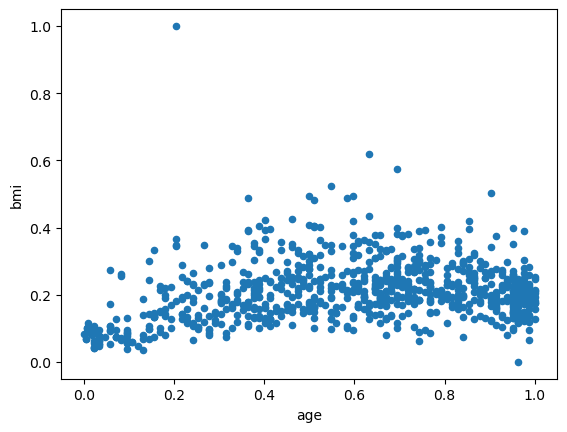

In [ ]:
mms=MinMaxScaler()
mms_scaled=mms.fit_transform(df)
mms_scaled_df=pd.DataFrame(mms_scaled, columns=df.columns)
mms_scaled_df
mms_scaled_df.plot.scatter(x='age', y='bmi')

### StandardScaler

<Axes: xlabel='age', ylabel='bmi'>

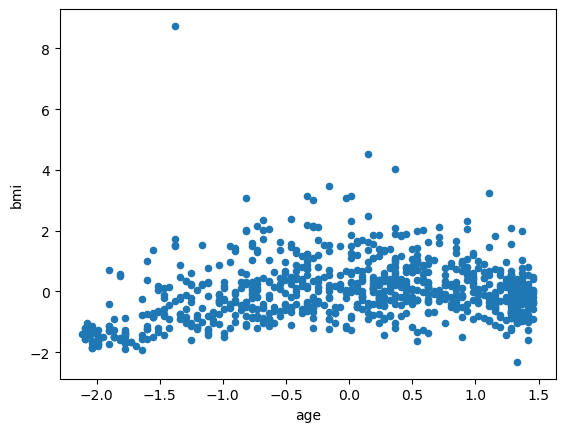

In [ ]:
ss=StandardScaler()
ss_Scaled=ss.fit_transform(df)
ss_Scaled_df=pd.DataFrame(ss_Scaled, columns=df.columns)
ss_Scaled_df.plot.scatter(x='age',y='bmi')

### Get number of possible clusters

In [ ]:
inertia=[]
k_values=list(range(1,11))
for i in k_values:
    model=KMeans(n_clusters=i, n_init='auto',random_state=13)
    model.fit(ss_Scaled_df)
    inertia.append(model.inertia_)
inertia_df=pd.DataFrame({'k':k_values, 'inertia':inertia})
inertia_df.plot(x='k',y='inertia')

In [ ]:
inertia=[]
k_values=list(range(1,11))
for i in k_values:
    model=KMeans(n_clusters=i, n_init='auto',random_state=13)
    model.fit(mms_scaled_df)
    inertia.append(model.inertia_)
inertia_df=pd.DataFrame({'k':k_values, 'inertia':inertia})
inertia_df.plot(x='k',y='inertia')

In [ ]:
mms_model = KMeans(n_clusters=4, n_init='auto',random_state=13)
mms_model.fit(mms_scaled_df)
prediction = mms_model.predict(mms_scaled_df)
mms_scaled_df['prediction'] = prediction
mms_scaled_df.plot.scatter(x='age', y='bmi',c='prediction',colormap='winter')


In [ ]:
mms_scaled_df['prediction'].value_counts()/len(mms_scaled_df)

In [22]:
for key,df in DataFrames.items():
          X=df.copy().drop(columns='stroke')
          y=df['stroke']
          X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)